In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import re
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Added libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
import pandas as pd

# Replace with your actual CSV file name or path
df = pd.read_csv("green house.csv")  # e.g., df = pd.read_csv("plant_data.csv")

In [3]:
df.head()

,ID,Canopy Height,Plant Height,Vegetarian Wet %,Vegetarian Dry %,Root Wet %,Root Dry %,Leaf Area,Leaf Count,Root Depth,Root Length
0,R1,34.533468,54.566983,1.147449,18.399982,2.949240,57.633906,1284.229549,4.999713,16.274918,19.739037
1,R1,34.489028,54.567692,1.149530,18.398288,2.943137,57.633697,1284.247744,5.024259,16.269452,19.758836
2,R2,33.100405,67.067344,1.104647,19.398789,2.861635,41.289875,1009.208996,5.007652,15.980760,20.840822
3,R1,34.498319,54.559049,1.137759,18.413613,2.946784,57.645661,1284.227623,4.991501,16.276710,19.736098
4,R3,36.297008,45.588894,1.363205,31.423772,2.766242,27.898619,981.470310,4.003682,16.979894,17.331894


In [4]:
df.tail()

,ID,Canopy Height,Plant Height,Vegetarian Wet %,Vegetarian Dry %,Root Wet %,Root Dry %,Leaf Area,Leaf Count,Root Depth,Root Length
29995,R3,46.400873,50.830830,0.883813,12.812881,3.264946,33.343799,744.310093,4.012024,17.796293,18.457811
29996,R3,46.395047,50.838058,0.900390,12.822240,3.259574,33.338906,744.307234,4.011764,17.809462,18.457313
29997,R2,32.707725,37.065408,0.909055,8.050019,3.495121,26.041147,857.849380,2.992712,18.200984,19.070005
29998,R1,38.624079,37.876323,1.077557,11.953827,3.141850,39.125346,948.663424,4.002284,15.733098,19.164418
29999,R3,46.409177,50.841213,0.871211,12.816439,3.270421,33.353872,744.298380,4.020517,17.813723,18.455817


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                30000 non-null  object 
 1   Canopy Height     30000 non-null  float64
 2   Plant Height      30000 non-null  float64
 3   Vegetarian Wet %  30000 non-null  float64
 4   Vegetarian Dry %  30000 non-null  float64
 5   Root Wet %        30000 non-null  float64
 6   Root Dry %        30000 non-null  float64
 7   Leaf Area         30000 non-null  float64
 8   Leaf Count        30000 non-null  float64
 9   Root Depth        30000 non-null  float64
 10  Root Length       30000 non-null  float64
dtypes: float64(10), object(1)
memory usage: 2.5+ MB


In [6]:
df.describe()

,Canopy Height,Plant Height,Vegetarian Wet %,Vegetarian Dry %,Root Wet %,Root Dry %,Leaf Area,Leaf Count,Root Depth,Root Length
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,38.060575,59.020331,1.247257,22.674553,2.907011,34.922184,1063.639833,3.944789,16.285792,18.071061
std,4.441682,11.985213,0.245989,9.571091,1.361928,7.998132,260.712823,0.702537,2.882793,2.932830
min,32.664004,37.020398,0.848351,8.021505,1.126715,23.632527,658.488225,2.959173,11.075737,12.359924
25%,34.399604,51.059436,1.064865,14.980983,1.911408,28.650713,875.501356,3.013099,13.933350,15.600294
50%,36.575753,55.912058,1.211328,21.954006,2.818611,33.372665,1009.249080,3.998577,16.248496,18.477019
75%,42.300836,67.069465,1.501692,27.711471,3.254133,39.137224,1243.866525,4.015829,18.202577,20.365252
max,46.431668,77.040610,1.775383,43.660373,6.908923,57.672004,1751.031654,5.037358,23.325870,23.253049


In [7]:
df.isnull().sum()

ID                  0
Canopy Height       0
Plant Height        0
Vegetarian Wet %    0
Vegetarian Dry %    0
Root Wet %          0
Root Dry %          0
Leaf Area           0
Leaf Count          0
Root Depth          0
Root Length         0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dtypes

ID                   object
Canopy Height       float64
Plant Height        float64
Vegetarian Wet %    float64
Vegetarian Dry %    float64
Root Wet %          float64
Root Dry %          float64
Leaf Area           float64
Leaf Count          float64
Root Depth          float64
Root Length         float64
dtype: object

In [10]:
df.shape

(30000, 11)

In [11]:
df.columns

Index(['ID', 'Canopy Height', 'Plant Height', 'Vegetarian Wet %',
       'Vegetarian Dry %', 'Root Wet %', 'Root Dry %', 'Leaf Area',
       'Leaf Count', 'Root Depth', 'Root Length'],
      dtype='object')

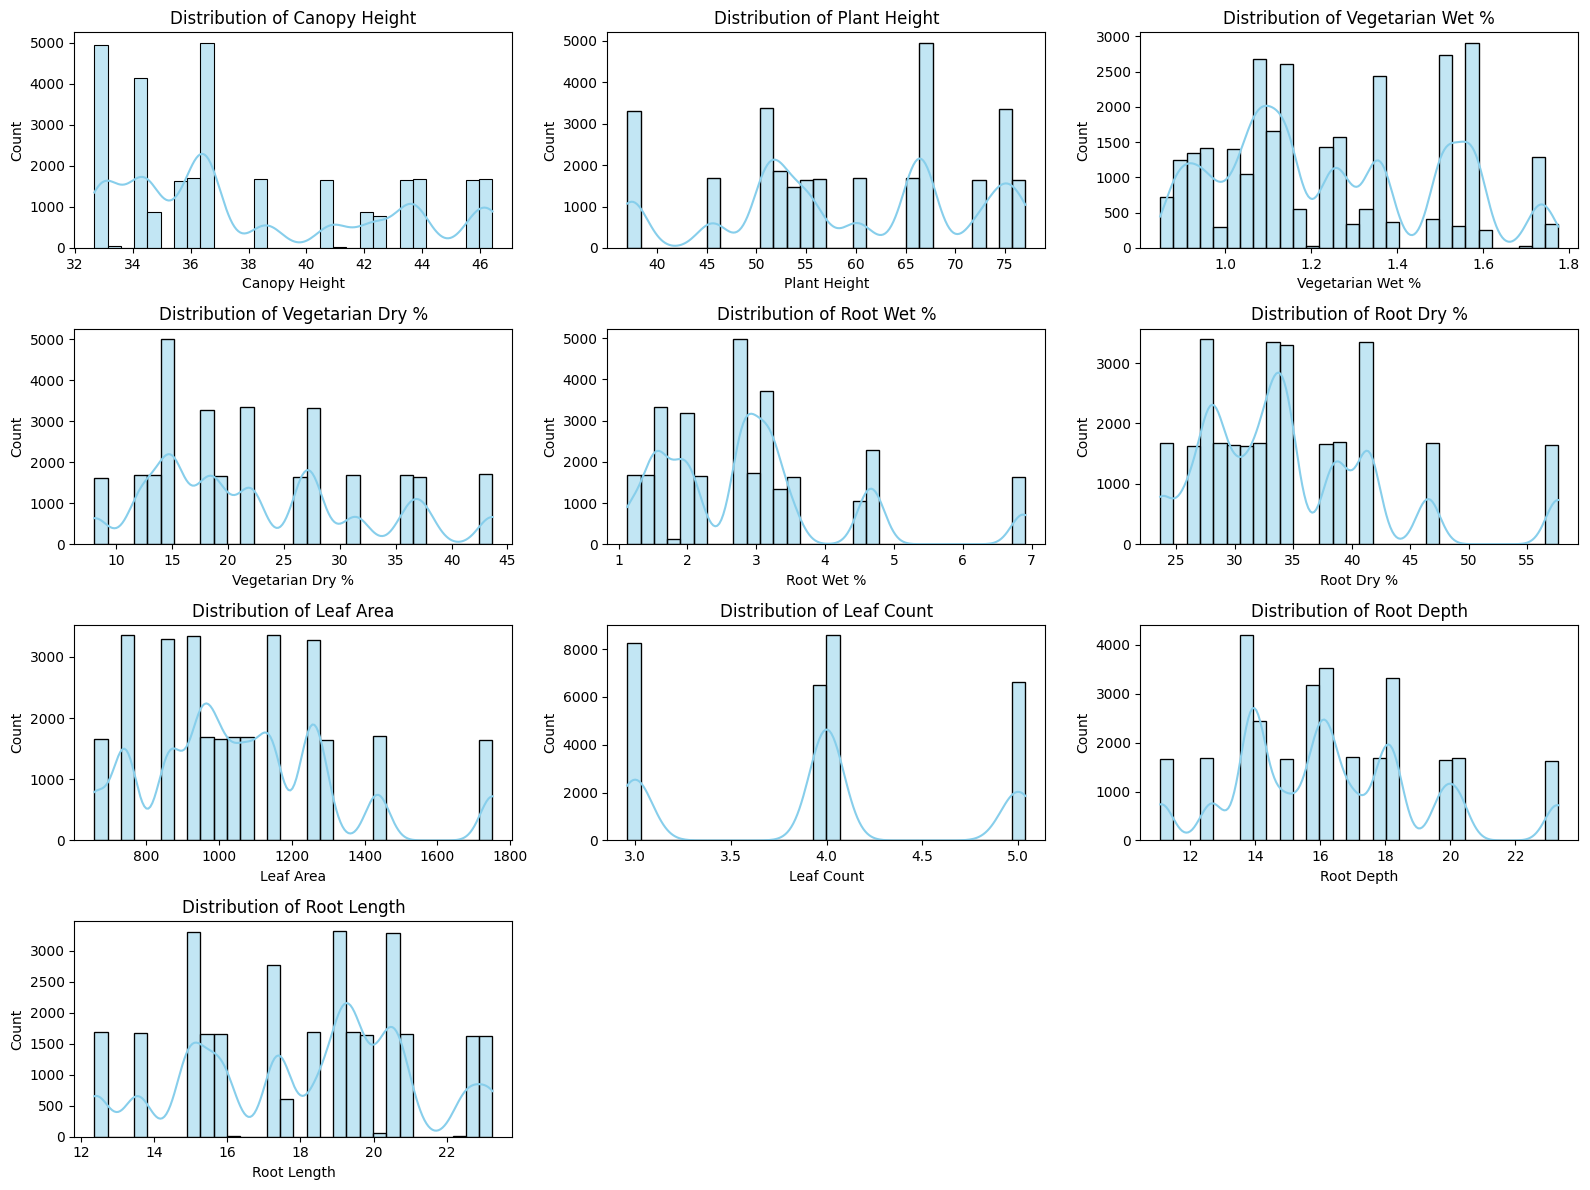

In [12]:
# List of actual numeric features (excluding 'ID')
features = [
    'Canopy Height', 'Plant Height', 'Vegetarian Wet %', 'Vegetarian Dry %',
    'Root Wet %', 'Root Dry %', 'Leaf Area', 'Leaf Count',
    'Root Depth', 'Root Length'
]

# Plot histograms
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()

plt.show()

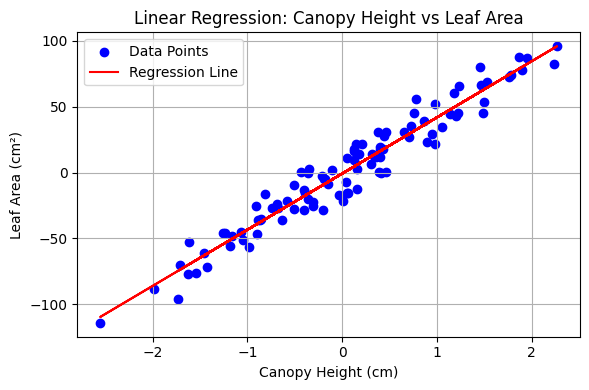

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression

# Generate synthetic regression data
np.random.seed(0)
X_lin, y_lin = make_regression(n_samples=100, n_features=1, noise=10)

# Train model
model_lin = LinearRegression()
model_lin.fit(X_lin, y_lin)
y_pred_lin = model_lin.predict(X_lin)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X_lin, y_lin, color='blue', label='Data Points')
plt.plot(X_lin, y_pred_lin, color='red', label='Regression Line')
plt.title("Linear Regression: Canopy Height vs Leaf Area")
plt.xlabel("Canopy Height (cm)")
plt.ylabel("Leaf Area (cm²)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


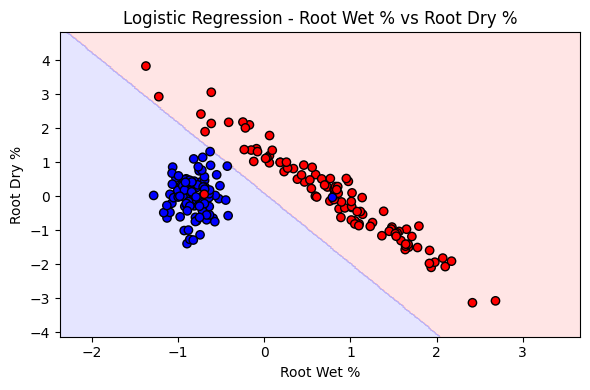

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Generate classification data
X_log, y_log = make_classification(n_samples=200, n_features=2, n_redundant=0,
                                   n_informative=2, n_clusters_per_class=1, random_state=3)

# Scale features
scaler = StandardScaler()
X_log = scaler.fit_transform(X_log)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.3, random_state=42)

# Train Logistic Regression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

# Decision boundary
h = 0.02
x_min, x_max = X_log[:, 0].min() - 1, X_log[:, 0].max() + 1
y_min, y_max = X_log[:, 1].min() - 1, X_log[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model_log.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
plt.scatter(X_log[:, 0], X_log[:, 1], c=y_log, edgecolor='k', cmap=ListedColormap(['#FF0000', '#0000FF']))
plt.title("Logistic Regression - Root Wet % vs Root Dry %")
plt.xlabel("Root Wet %")
plt.ylabel("Root Dry %")
plt.tight_layout()
plt.show()


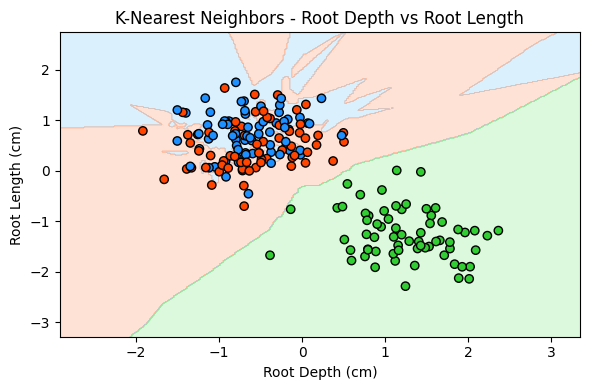

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

# Generate blob data
X_knn, y_knn = make_blobs(n_samples=200, centers=3, random_state=5, cluster_std=1.5)

# Scale features
scaler = StandardScaler()
X_knn = scaler.fit_transform(X_knn)

# Train KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_knn, y_knn)

# Decision boundary
h = 0.02
x_min, x_max = X_knn[:, 0].min() - 1, X_knn[:, 0].max() + 1
y_min, y_max = X_knn[:, 1].min() - 1, X_knn[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model_knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFA07A', '#87CEFA', '#90EE90']))
plt.scatter(X_knn[:, 0], X_knn[:, 1], c=y_knn, edgecolor='k', cmap=ListedColormap(['#FF4500', '#1E90FF', '#32CD32']))
plt.title("K-Nearest Neighbors - Root Depth vs Root Length")
plt.xlabel("Root Depth (cm)")
plt.ylabel("Root Length (cm)")
plt.tight_layout()
plt.show()



Logistic Regression Accuracy: 51.17%


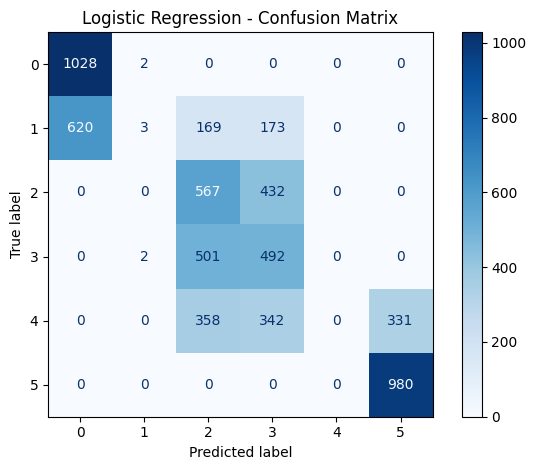


K-Nearest Neighbors Accuracy: 45.38%


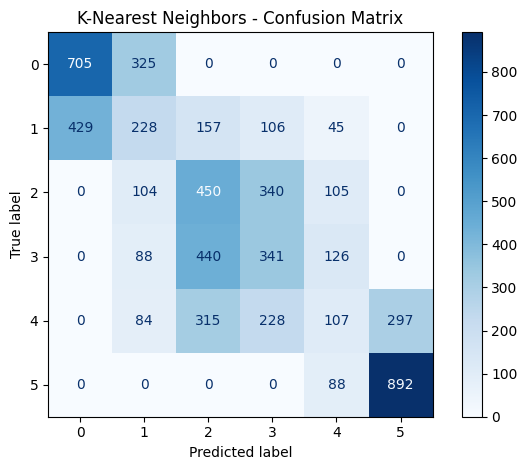

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming df is already loaded and cleaned

# Ensure column names lowercase and stripped
df.columns = df.columns.str.strip().str.lower()

# Define target and features as per your list (lowercased)
target_col = 'leaf count'
features_list = [
    'canopy height',
    'plant height',
    'vegetarian wet %',
    'vegetarian dry %',
    'root wet %',
    'root dry %',
    'leaf area',
    'root depth',
    'root length'
]

# Drop rows with missing target
df = df.dropna(subset=[target_col])

# Bin the target column into 6 quantile bins
df['leaf_bin'] = pd.qcut(df[target_col], q=6, labels=False)

# Select features, ensure they exist in df (some column names might differ in capitalization)
features = [f for f in features_list if f in df.columns]

X = df[features]
y = df['leaf_bin']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models: Logistic Regression and KNN only
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}

# Train, predict, evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred) * 100
    print(f"\n{name} Accuracy: {acc:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.tight_layout()
    plt.show()